# Database Management Resit: Carl Hümbs

**Main research question: (From the group project)**
* *"What are the key determinants of successful worldwide box office sales for movies?"*

**Sub-question: (Newly made for the resit)**
* *"What impact do film genres have on the likelihood of a film production breaking even? "*

**Leading to these hypotheses:**

H0: The genre of a film does not affect the likelihood of a film breaking even.

HA: The genre of a film has a significant impact on the likelihood of a film breaking even.

In [1]:
#importing the necessary libraries 

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Connecting to the PostgreSQL database and retrieving the necessary data

# Database connection details

connection = psycopg2.connect(
    host="localhost", 
    database="PROJECT 1_Group 5", 
    user="postgres", 
    password="Boyz341")


# Defining the SQL query to fetch the data

query = """
        SELECT g.genre, 
              COUNT(CASE WHEN s.worldwide_box_office >= s.production_budget THEN 1 ELSE NULL END) AS break_even_count,
              COUNT(*) AS total_movies_count
        FROM final_sales AS s
        JOIN hasgenre AS hg ON s.movieid = hg.movieid
        JOIN genre AS g ON hg.genreid = g.genreid
        GROUP BY g.genre
        """

# Executing the query and reading data into a DataFrame using psycopg2 connection
data = pd.read_sql(query, connection)

# Closing the database connection
connection.close()

# Now having a first look at the dataframe
data

/var/folders/k4/qg_rhcgs63z83dk0wwghr6tc0000gn/T/ipykernel_26020/2178559631.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


,genre,break_even_count,total_movies_count
0,thriller,604,2950
1,animation,112,166
2,romance,295,857
3,short,0,7
4,documentary,59,4756
5,sport,49,164
6,war,43,179
7,mystery,143,340
8,western,19,120
9,multiple genres,0,159


In [3]:
# Calculating break-even ratio
data['break_even_ratio'] = data['break_even_count'] / data['total_movies_count']

# Selecting and display only 'genre' and 'break_even_ratio' columns
result = data[['genre', 'break_even_ratio']]

# Sorting the DataFrame by break-even ratio in descending order
result.sort_values(by='break_even_ratio', ascending=False, inplace=True)

# Printing the result
print(result)

              genre  break_even_ratio
1         animation          0.674699
14           family          0.626582
29           sci-fi          0.608150
22          fantasy          0.594502
7           mystery          0.420588
13            crime          0.383628
2           romance          0.344224
25            adult          0.333333
5             sport          0.298780
12           action          0.261181
19        adventure          0.254087
6               war          0.240223
28            music          0.225694
15          history          0.223214
27        biography          0.211957
0          thriller          0.204746
11     black comedy          0.187755
10           horror          0.164507
8           western          0.158333
17           comedy          0.146466
16          musical          0.130000
20  romantic comedy          0.122345
23            drama          0.096582
26             news          0.025000
24          concert          0.012950
4       docu

/var/folders/k4/qg_rhcgs63z83dk0wwghr6tc0000gn/T/ipykernel_26020/3763464811.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.sort_values(by='break_even_ratio', ascending=False, inplace=True)


/var/folders/k4/qg_rhcgs63z83dk0wwghr6tc0000gn/T/ipykernel_26020/883193103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.sort_values(by='break_even_ratio', ascending=False, inplace=True)


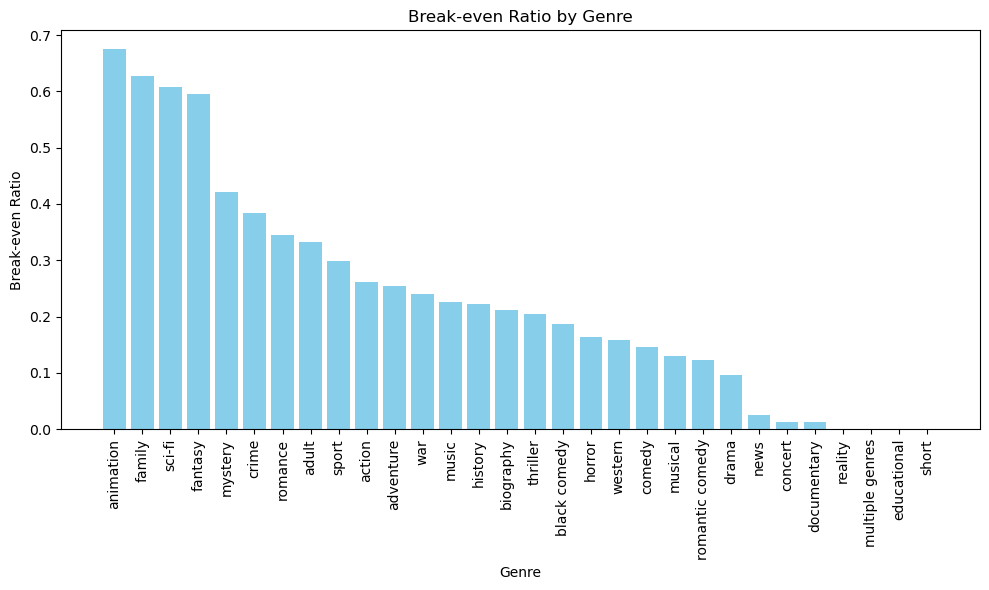

In [4]:
# Sorting the DataFrame by break-even ratio in descending order

result.sort_values(by='break_even_ratio', ascending=False, inplace=True)

# Creating a bar chart to illustrate the results

plt.figure(figsize=(10, 6))
plt.bar(result['genre'], result['break_even_ratio'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Break-even Ratio')
plt.title('Break-even Ratio by Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## **Conclusion:**

#### Summary
The results show that the break-even ratio differes enormously between different genres. Therefore we reject H0 in favour of HA.


#### In depth review


The results show the break-even ratios for different movie genres. The break-even ratio represents the percentage of movies within each genre that break even (earn back their production budget). Here's how to interpret these results:

1. **Animation (67.47% Break-even Ratio):** Animated movies have a relatively high likelihood of breaking even, with about 67.47% of them covering their production costs.
2. **Family (62.66% Break-even Ratio):** Family-oriented films also perform well, with approximately 62.66% of them breaking even.
3. **Sci-Fi (60.82% Break-even Ratio):** Science fiction movies have a moderate break-even ratio, indicating that a majority of them are profitable.
4. **Fantasy (59.45% Break-even Ratio):** Fantasy films have a slightly lower break-even ratio compared to sci-fi movies but still show a good chance of breaking even.
5. **Mystery (42.06% Break-even Ratio):** Mystery movies have a lower break-even ratio, suggesting that less than half of them manage to cover their production costs.
6. **Crime (38.36% Break-even Ratio):** Crime genre movies also have a relatively lower chance of breaking even compared to other genres.
7. **Romance (34.42% Break-even Ratio):** Romance movies have a lower likelihood of breaking even, with only about 34.42% of them managing to do so.
8. **Action (26.12% Break-even Ratio):** Action movies have a relatively low break-even ratio, indicating that less than a quarter of them break even.
9. **Thriller (20.47% Break-even Ratio):** Thriller movies have a low probability of breaking even, with only about 20.47% of them covering their production costs.
10. **Horror (16.45% Break-even Ratio):** Horror films have a lower chance of breaking even, with approximately 16.45% of them managing to do so.
11. **Drama (9.66% Break-even Ratio):** Dramatic movies have a very low likelihood of breaking even, with only around 9.66% of them earning back their production budget.
12. **Documentary (1.24% Break-even Ratio):** Documentaries have an extremely low break-even ratio, indicating that only a very small fraction of them manage to cover their costs.
13. **Reality, Educational, Short, Multiple Genres, and Concert (0% Break-even Ratio):** These genres have a 0% break-even ratio, suggesting that none of the movies in these genres have been profitable based on the available data.

Please note that the interpretation of these results should consider the limitations of the dataset and the context of the movie industry.